# Graph Analytics Exploration

* https://stackoverflow.com/questions/39274216/visualize-an-rdflib-graph-in-python
* https://networkx.org/documentation/stable/reference/algorithms/link_analysis.html

## Steps

* Pull in the OIH RDF graph and load 


In [1]:
!pip -q install pydotplus
!pip -q install graphviz
# !pip -q install rdflib
# !pip install -q -e git+https://github.com/RDFLib/rdflib.git#egg=rdflib
!pip -q install pydotplus
!pip -q install mimesis
!pip -q install minio 
!pip -q install s3fs
!pip -q install SPARQLWrapper
!pip -q install boto3
!pip -q install 'fsspec>=0.3.3'
!pip -q install rdflib
!pip -q install rdflib-jsonld
!pip -q install PyLD==2.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 1.3.1 requires botocore<1.20.50,>=1.20.49, but you have botocore 1.20.102 which is incompatible.


In [3]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
import networkx as nx
import matplotlib.pyplot as plt
import gzip

with gzip.open('./oceanexperts_graph.nq.gz', 'rb') as f:
    file_content = f.read()

g = rdflib.Graph()
g.parse(data = file_content, format="nquads")

G = rdflib_to_networkx_digraph(g)
# G = rdflib_to_networkx_multidigraph(result)

# # Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=2)
# edge_labels = nx.get_edge_attributes(G, 'r')b
# #nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw_networkx_edge_labels(G, pos)
# nx.draw(G, with_labels=True)

In [4]:
pr = nx.pagerank(G,alpha=0.9)
# for key, value in pr.items():
#     print(key, ' : ', value)

In [5]:
import pandas as pd
prdf = pd.DataFrame.from_dict(pr, orient='index')

In [6]:
prdf.dtypes

0    float64
dtype: object

In [7]:
prdf.sort_values(by=0,ascending=False, inplace=True,)
prdf.head(20)

,0
https://schema.org/Place,0.058482
https://schema.org/CourseInstance,0.018446
https://schema.org/Course,0.016571
UNESCO/IOC Project Office for IODE Wandelaarkaai 7 - Pakhuis 61 B-8400 Oostende Belgium,0.007863
Russia,0.007497
UNESCO/IOC Project Office for IODE Wandelaarkaai 7 8400 Oostende Belgium,0.006203
Wandelaarkaai 7 8400 Oostende Belgium,0.003761
Belgium,0.002931
RV Professor Logachev Russia,0.002624
UNESCO / IOC Project Office for IODE Wandelaarkaai 7 8400 Oostende Belgium,0.002360


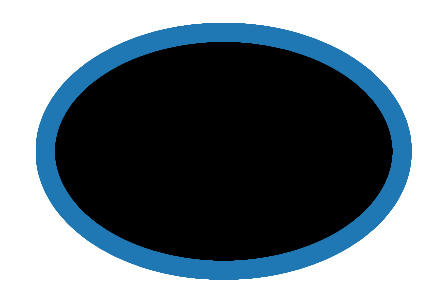

In [8]:
nx.draw_circular(G, with_labels = False)
plt.show() # display

(array([3.499e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  86.5, 172. , 257.5, 343. , 428.5, 514. , 599.5, 685. ,
        770.5, 856. ]),
 <BarContainer object of 10 artists>)

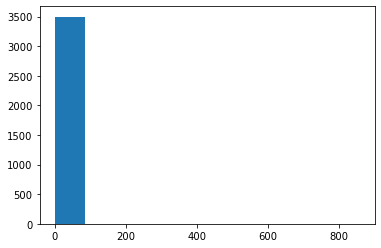

In [9]:
plt.hist([v for k,v in nx.degree(G)])

(array([2200.,    0.,    0.,    0.,    0.,  858.,    0.,   20.,    0.,
         424.]),
 array([0.00000000e+00, 3.26437344e-08, 6.52874689e-08, 9.79312033e-08,
        1.30574938e-07, 1.63218672e-07, 1.95862407e-07, 2.28506141e-07,
        2.61149876e-07, 2.93793610e-07, 3.26437344e-07]),
 <BarContainer object of 10 artists>)

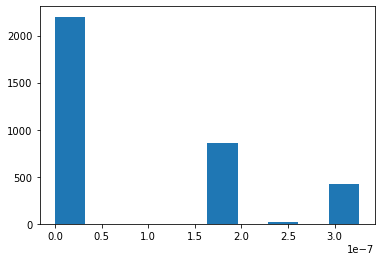

In [10]:
plt.hist(nx.centrality.betweenness_centrality(G).values())